In [42]:
import pandas as pd

df = pd.read_csv('nifty_50.csv')
df = df.dropna()
df = df[::-1].reset_index()
df = df[['Date', 'Open', 'High', 'Low', 'Close']]

In [43]:
from dateutil.parser import parse

def prevHoliday(prev, cur):
    dt1 = parse(prev)
    dt2 = parse(cur)
    delta = dt2 - dt1
    return 1 if delta.days > 1 else 0

size = df['Date'].size
df['After holiday'] = [0 if i == 0 else prevHoliday(df.iloc[i - 1]['Date'], df.iloc[i]['Date']) for i in range(size)]
df.head(30)

,Date,Open,High,Low,Close,After holiday
0,03 Nov 1995,994.20,1000.91,992.69,1000.00,0
1,06 Nov 1995,1001.53,1001.53,988.92,988.92,1
2,07 Nov 1995,987.17,987.17,977.05,978.22,0
3,08 Nov 1995,976.28,976.28,962.98,964.01,0
4,09 Nov 1995,960.32,960.32,952.13,953.07,0
5,10 Nov 1995,951.93,951.93,946.00,948.82,0
6,13 Nov 1995,949.29,949.29,916.48,917.26,1
7,14 Nov 1995,916.66,916.66,897.52,902.56,0
8,15 Nov 1995,901.33,913.54,901.33,913.21,0
9,16 Nov 1995,915.96,915.96,900.83,904.08,0


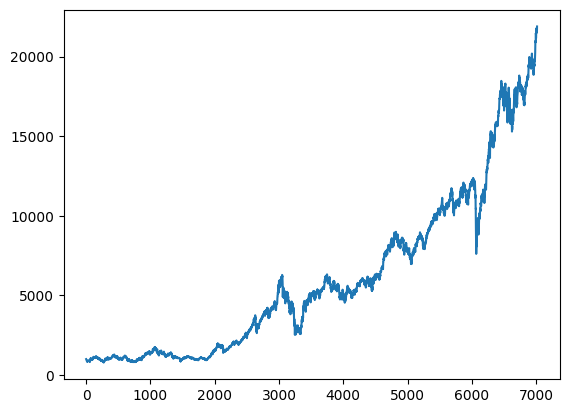

In [44]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])

In [45]:
df.index = df.pop('Date')

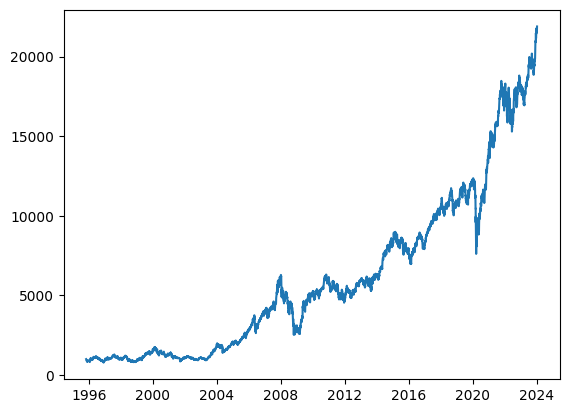

In [46]:
df.index = pd.to_datetime(df.index)
plt.plot(df['Close'])

In [47]:
df['Close1'] = [None if i < 3 else df['Close'][i - 1] for i in range(0, size)]
df['Close2'] = [None if i < 3 else df['Close'][i - 2] for i in range(0, size)]
df['Close3'] = [None if i < 3 else df['Close'][i - 3] for i in range(0, size)]

df = df.dropna()
df = df.drop(columns=['High', 'Low', 'Open'])
df

C:\Users\vedan\AppData\Local\Temp\ipykernel_5236\2747091970.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Close1'] = [None if i < 3 else df['Close'][i - 1] for i in range(0, size)]
C:\Users\vedan\AppData\Local\Temp\ipykernel_5236\2747091970.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Close2'] = [None if i < 3 else df['Close'][i - 2] for i in range(0, size)]
C:\Users\vedan\AppData\Local\Temp\ipykernel_5236\2747091970.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

,Close,After holiday,Close1,Close2,Close3
Date,,,,,
1995-11-08,964.01,0,978.22,988.92,1000.00
1995-11-09,953.07,0,964.01,978.22,988.92
1995-11-10,948.82,0,953.07,964.01,978.22
1995-11-13,917.26,1,948.82,953.07,964.01
1995-11-14,902.56,0,917.26,948.82,953.07
...,...,...,...,...,...
2024-01-08,21513.00,1,21710.80,21658.60,21517.35
2024-01-09,21544.85,0,21513.00,21710.80,21658.60
2024-01-10,21618.70,0,21544.85,21513.00,21710.80


In [48]:
q_80 = int(df.index.size * 0.8)

input_data = df.iloc[:, [1, 2, 3, 4]].to_numpy()
output_data = df.iloc[:, [0]].to_numpy()
dates = df.index

reshaped_input = input_data.reshape((len(input_data), input_data.shape[1], 1))

train_input = reshaped_input[:q_80]
train_output = output_data[:q_80]

test_input = reshaped_input[q_80:]
test_output = output_data[q_80:]

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input(4),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.0005), metrics=['mean_absolute_error'])
model.fit(train_input, train_output, validation_split=0.1, epochs=50)

Epoch 1/50
158/158 [==============================] - 1s 2ms/step - loss: 7371775.0000 - mean_absolute_error: 1780.0128 - val_loss: 26575.6367 - val_mean_absolute_error: 145.9589
Epoch 2/50
158/158 [==============================] - 0s 1ms/step - loss: 4371.5688 - mean_absolute_error: 43.1121 - val_loss: 6922.0913 - val_mean_absolute_error: 65.4112
Epoch 3/50
158/158 [==============================] - 0s 1ms/step - loss: 4189.1606 - mean_absolute_error: 41.8702 - val_loss: 6783.1895 - val_mean_absolute_error: 64.6504
Epoch 4/50
158/158 [==============================] - 0s 1ms/step - loss: 4099.6348 - mean_absolute_error: 41.4991 - val_loss: 6258.4819 - val_mean_absolute_error: 60.1409
Epoch 5/50
158/158 [==============================] - 0s 1ms/step - loss: 4021.7368 - mean_absolute_error: 40.9528 - val_loss: 6225.8169 - val_mean_absolute_error: 59.5884
Epoch 6/50
158/158 [==============================] - 0s 1ms/step - loss: 3974.5352 - mean_absolute_error: 40.8366 - val_loss: 6436.0

3/3 [==============================] - 0s 1ms/step


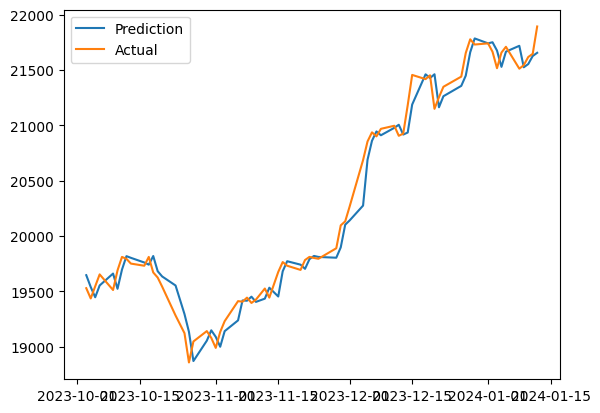

In [55]:
q_99 = int(df.index.size * 0.99)
fine_test_dates = dates[q_99:]
fine_test_input = reshaped_input[q_99:]
fine_test_output = output_data[q_99:]
predicated_val = model.predict(fine_test_input).flatten()

plt.plot(fine_test_dates, predicated_val)
plt.plot(fine_test_dates, fine_test_output)
plt.legend(['Prediction', 'Actual'])
plt.show()